In [185]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.metrics import *
import statsmodels.api as sm

In [186]:
df = pd.read_csv('data_cleaned.csv')

In [187]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


On constate que les valeurs de 'smoker' sont des strings. Nous allons les convertirs en int avec 0 pour non fumeurs et 1 pour fumeurs

In [188]:
# Remplacement des valeurs
df['smoker'] = df['smoker'].replace({'yes': 1, 'no': 0})

In [189]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520


On constate que les valeurs de 'sexr' sont des strings. Nous allons les convertirs en int avec 0 pour les femmes et 1 pour les hommes

In [190]:
# Remplacement des valeurs
df['sex'] = df['sex'].replace({'male': 1, 'female': 0})
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


On souhaite faire une modification des régions en les spiltants par localisation

In [191]:
# Création des colonnes is_region
region_dummies = pd.get_dummies(df['region'], prefix='is')



# Fusionner les dummies avec le dataframe original
df = pd.concat([df, region_dummies], axis=1)
df = df.drop(['region'], axis=1)

# Transformer les booléens en valeurs numériques
bool_columns = ['is_northeast', 'is_northwest', 'is_southeast', 'is_southwest']
for col in bool_columns:
    if col in df.columns:
        df[col] = df[col].astype(int)
        
df.head()

,age,sex,bmi,children,smoker,charges,is_northeast,is_northwest,is_southeast,is_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


In [192]:
# Séparez les données en variables indépendantes (X) et dépendante (y)
X = df.drop('charges', axis=1)
y = df['charges']



Régression Linéaire et Visualisation pour l'Âge

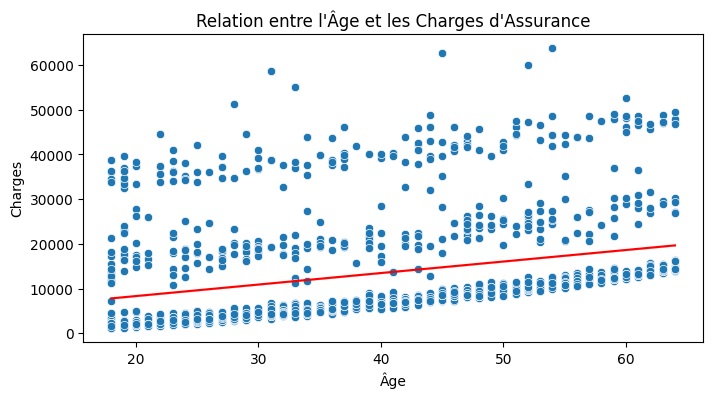

In [193]:
# Régression linéaire pour 'age'
X = sm.add_constant(df['age'])
y = df['charges']
model = sm.OLS(y, X).fit()

# Affichage du graphique
plt.figure(figsize=(8, 4))
sns.scatterplot(x=df['age'], y=y)
sns.lineplot(x=df['age'], y=model.predict(X), color='red')
plt.title('Relation entre l\'Âge et les Charges d\'Assurance')
plt.xlabel('Âge')
plt.ylabel('Charges')
plt.show()


On observe une tendance générale à la hausse des charges d'assurance avec l'âge, comme le montre la ligne de régression en rouge.
La distribution des charges semble être regroupée en trois bandes distinctes horizontalement. Cela peut indiquer l'existence de groupes ou de sous-populations au sein des données, qui pourraient correspondre à des non-fumeurs, des fumeurs occasionnels et des fumeurs réguliers, ou d'autres facteurs non identifiés par l'âge seul.
La variance des charges semble augmenter avec l'âge, ce qui suggère que d'autres variables (peut-être le statut de fumeur ou la présence de conditions préexistantes) pourraient également jouer un rôle important dans la détermination des charges d'assurance.

Régression Linéaire et Visualisation pour le BMI

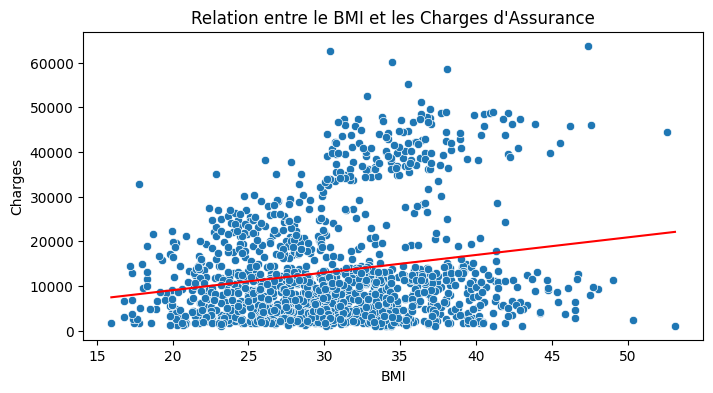

In [194]:
# Régression linéaire pour 'bmi'
X = sm.add_constant(df['bmi'])
y = df['charges']
model = sm.OLS(y, X).fit()

# Affichage du graphique
plt.figure(figsize=(8, 4))
sns.scatterplot(x=df['bmi'], y=y)
sns.lineplot(x=df['bmi'], y=model.predict(X), color='red')
plt.title('Relation entre le BMI et les Charges d\'Assurance')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

La relation entre l'IMC et les charges d'assurance semble moins claire que celle de l'âge. Il y a une légère tendance à la hausse, indiquant que des IMC plus élevés pourraient être associés à des charges d'assurance plus élevées.
Tout comme pour l'âge, il y a des bandes horizontales qui indiquent des groupes distincts dans les charges d'assurance. Cela peut à nouveau suggérer l'influence d'autres variables qui ne sont pas capturées par l'IMC seul.
Il n'y a pas de distinction claire ou de seuil d'IMC où les charges d'assurance augmentent de manière significative, ce qui suggère que l'IMC, en tant que facteur isolé, n'est pas un prédicteur aussi fort des charges d'assurance que l'âge peut l'être.

Dans les deux cas, les résultats soulignent l'importance de considérer des modèles de régression linéaire multiple ou d'autres formes d'analyse pour prendre en compte l'effet combiné de plusieurs caractéristiques. Ces graphiques mettent également en évidence la nécessité d'explorer plus avant les données pour comprendre les structures sous-jacentes qui produisent les motifs observés.

Nous allons faire des analyse univariée

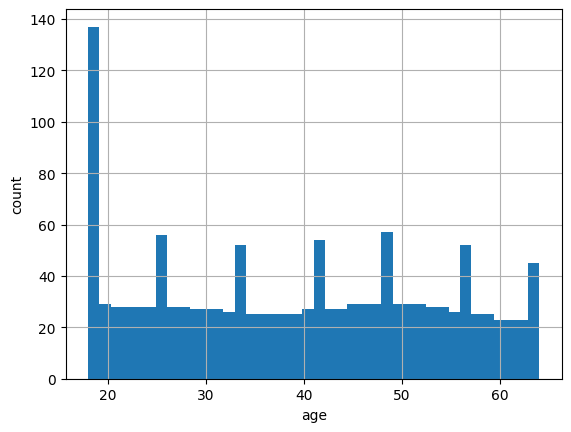

In [203]:
df['age'].hist(bins=40)
plt.xlabel('age')
plt.ylabel('count')
plt.show()

*Tranche d'âge jeune prédominante :*

La concentration élevée de clients dans la tranche d'âge la plus jeune pourrait indiquer que l'assureur attire principalement un public jeune. Cela peut être dû à des produits d'assurance conçus pour les jeunes adultes, tels que des tarifs réduits pour les étudiants ou des offres pour les nouveaux conducteurs.

Les pics à d'autres tranches d'âge pourraient représenter des cohortes de clients qui ont souscrit à des politiques spécifiques ou à des moments spécifiques. Par exemple, il pourrait y avoir des produits d'assurance ciblant des familles ou des professionnels à certaines étapes de leur vie.


Un pic dans le groupe d'âge le plus jeune peut également suggérer un biais dans la collecte des données ou dans l'attraction des clients. Par exemple, si l'inscription en ligne est privilégiée, cela pourrait naturellement incliner la base de clients vers un public plus jeune et plus technophile.

In [213]:
# Calcul des statistiques descriptives pour la variable 'age'
statistics = df['age'].describe()

# Calcul du mode séparément car 'describe()' ne le retourne pas
mode = df['age'].mode()

output_text = f"""Count: {statistics['count']} observations
Mean (Moyenne): {statistics['mean']:.2f} ans
Std (Écart-type): {statistics['std']:.2f} ans
Min (Minimum): {statistics['min']} ans
25%: {statistics['25%']} ans (premier quartile)
50% (Médiane): {statistics['50%']} ans
75%: {statistics['75%']} ans (troisième quartile)
Max (Maximum): {statistics['max']} ans
Mode (La valeur la plus fréquente): {mode[0]} ans"""

print(output_text)

Count: 1338.0 observations
Mean (Moyenne): 39.21 ans
Std (Écart-type): 14.05 ans
Min (Minimum): 18.0 ans
25%: 27.0 ans (premier quartile)
50% (Médiane): 39.0 ans
75%: 51.0 ans (troisième quartile)
Max (Maximum): 64.0 ans
Mode (La valeur la plus fréquente): 18 ans


analyse univariée de la catégorie sexe

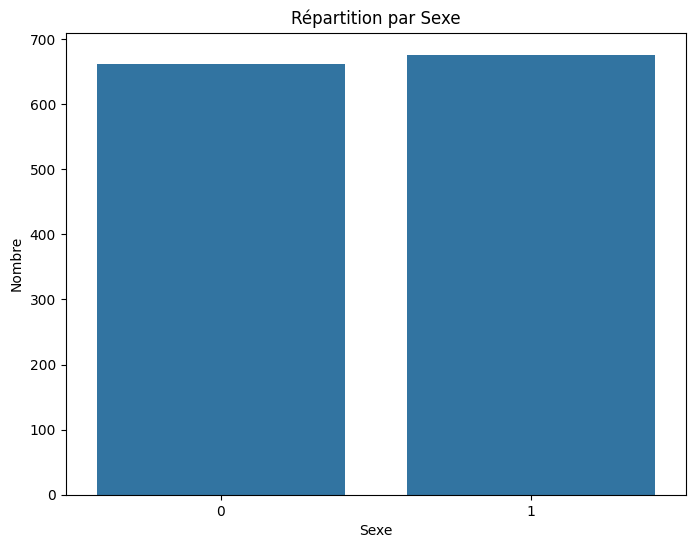

In [214]:
# Comptage des fréquences de chaque catégorie
sex_counts = df['sex'].value_counts()

# Création du diagramme en barres
plt.figure(figsize=(8, 6))
sns.barplot(x=sex_counts.index, y=sex_counts.values)
plt.title('Répartition par Sexe')
plt.xlabel('Sexe')
plt.ylabel('Nombre')
plt.show()

analyse univariée de BMI

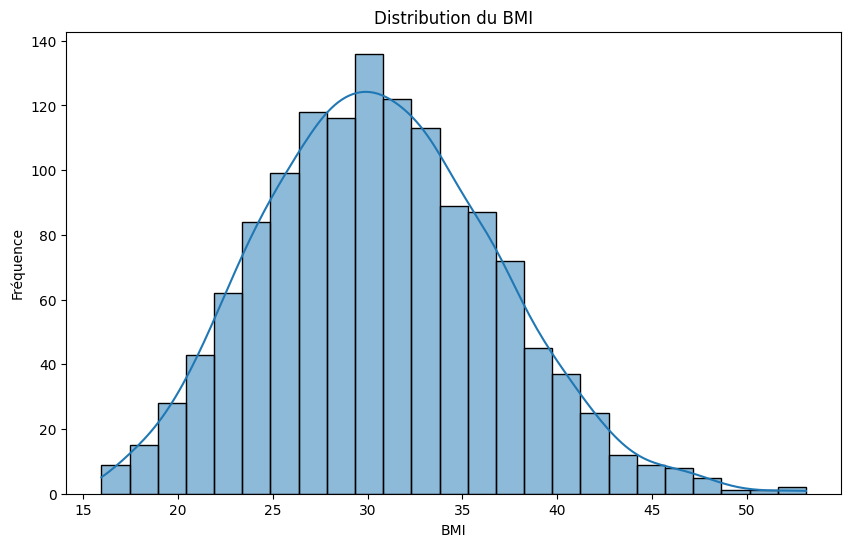

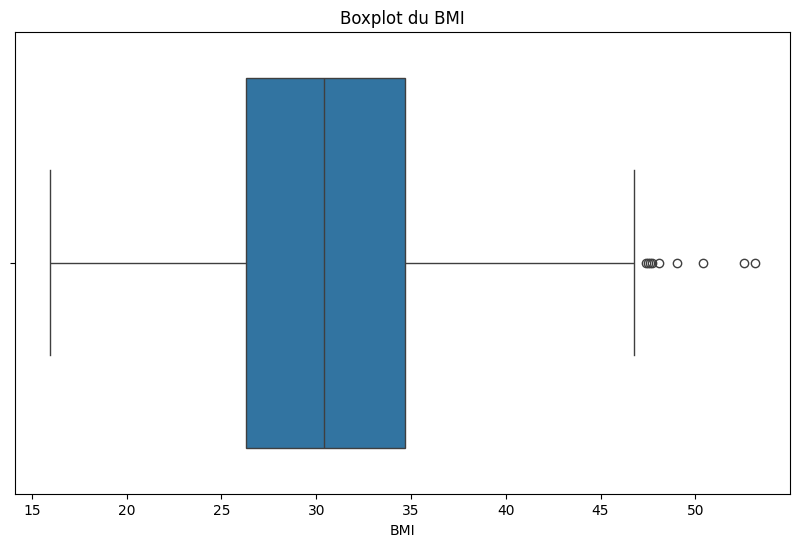

Count: 1338.0 observations
Mean (Moyenne): 30.66
Std (Écart-type): 6.10
Min (Minimum): 15.96
25%: 26.30 (premier quartile)
50% (Médiane): 30.40
75%: 34.69 (troisième quartile)
Max (Maximum): 53.13


In [217]:
# Histogramme du BMI
plt.figure(figsize=(10, 6))
sns.histplot(df['bmi'], kde=True)
plt.title('Distribution du BMI')
plt.xlabel('BMI')
plt.ylabel('Fréquence')
plt.show()

# Boxplot du BMI
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['bmi'])
plt.title('Boxplot du BMI')
plt.xlabel('BMI')
plt.show()

# Statistiques Descriptives
bmi_statistics = df['bmi'].describe()
# Création du texte formaté pour l'affichage
bmi_output_text = f"""Count: {bmi_statistics['count']} observations
Mean (Moyenne): {bmi_statistics['mean']:.2f}
Std (Écart-type): {bmi_statistics['std']:.2f}
Min (Minimum): {bmi_statistics['min']:.2f}
25%: {bmi_statistics['25%']:.2f} (premier quartile)
50% (Médiane): {bmi_statistics['50%']:.2f}
75%: {bmi_statistics['75%']:.2f} (troisième quartile)
Max (Maximum): {bmi_statistics['max']:.2f}"""

print(bmi_output_text)

L'histogramme montre que la distribution des valeurs de BMI ressemble à une distribution normale, avec un pic autour de la médiane.
La distribution est assez symétrique autour de la moyenne, avec une légère queue vers les valeurs plus élevées, comme le suggèrent les valeurs aberrantes observées dans le boxplot.

Le boxplot montrre que la médiane (ligne centrale de la boîte) est proche du centre de la boîte, ce qui suggère une distribution symétrique.
Les quartiles (bords de la boîte) montrent que 50% des valeurs de BMI se situent dans une plage relativement étroite, ce qui indique une certaine concentration autour de la médiane.
Il y a plusieurs valeurs aberrantes (indiquées par des points au-delà des moustaches) sur le côté supérieur de la boîte, indiquant des individus avec un BMI significativement plus élevé que la moyenne. Cela peut indiquer la présence de surpoids ou d'obésité au sein de la population étudiée.
La répartition des valeurs de BMI semble être assez normale sans une asymétrie évidente, malgré la présence de ces valeurs aberrantes.

Analyse univariée de children

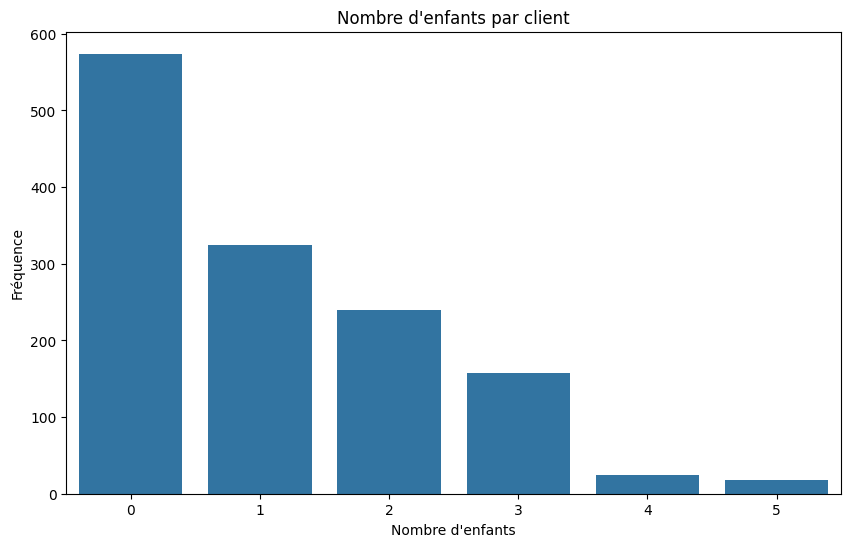

In [219]:
# Comptage des fréquences de chaque valeur
children_counts = df['children'].value_counts()

# Création du diagramme en barres
plt.figure(figsize=(10, 6))
sns.barplot(x=children_counts.index, y=children_counts.values)
plt.title('Nombre d\'enfants par client')
plt.xlabel('Nombre d\'enfants')
plt.ylabel('Fréquence')
plt.show()

La majorité des clients n'ont pas d'enfants :

La barre représentant les clients sans enfants est la plus haute, ce qui indique que la majorité des clients de cette base de données d'assurance n'ont pas d'enfants.
Diminution progressive avec le nombre d'enfants :

Il y a une diminution générale de la fréquence à mesure que le nombre d'enfants augmente. Cela suggère que les clients avec un plus grand nombre d'enfants sont moins communs dans cette population.
Peu de clients avec trois enfants ou plus :

Les clients ayant trois enfants ou plus sont nettement moins nombreux, avec une baisse encore plus prononcée pour ceux ayant quatre enfants ou plus.
Considérations pour les politiques d'assurance :

Ces informations peuvent être importantes pour la conception de produits d'assurance, car elles suggèrent que la plupart des clients pourraient ne pas chercher de couverture pour des personnes à charge nombreuses. Des politiques qui offrent des tarifs avantageux pour les familles sans enfants ou avec un seul enfant pourraient être plus attractives pour la majorité de cette base de clients.
Implications démographiques :

L'information peut aussi refléter des tendances démographiques plus larges, comme le choix de familles plus petites ou les défis économiques associés à l'éducation de plusieurs enfants.
Répartition de la base de clients :

Cela pourrait indiquer que la base de clients est jeune ou que les clients plus âgés dont les enfants sont devenus adultes ne sont pas comptabilisés dans cette variable.

analyse univariée de Smoker

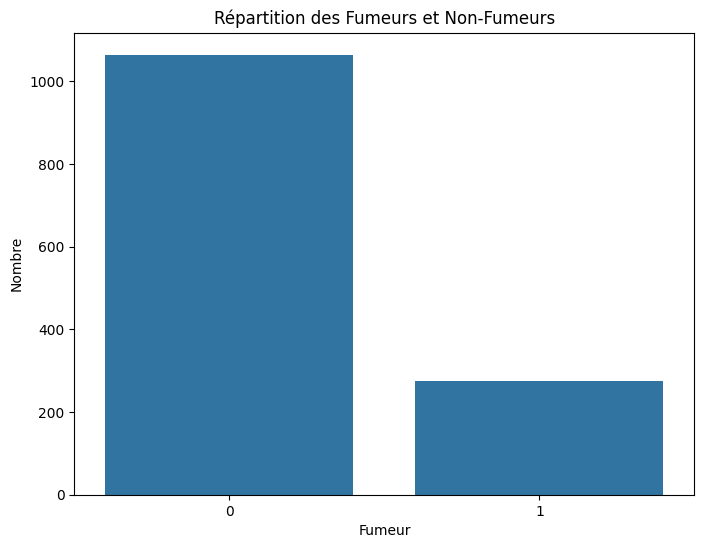

In [220]:
# Comptage des fréquences de chaque catégorie
smoker_counts = df['smoker'].value_counts()

# Création du diagramme en barres
plt.figure(figsize=(8, 6))
sns.barplot(x=smoker_counts.index, y=smoker_counts.values)
plt.title('Répartition des Fumeurs et Non-Fumeurs')
plt.xlabel('Fumeur')
plt.ylabel('Nombre')
plt.show()

Répartition des fumeurs et non-fumeurs : Il est clair que le nombre de non-fumeurs (indiqué par la barre correspondant à 0) est significativement plus élevé que celui des fumeurs (indiqué par la barre correspondant à 1). Cela indique que dans la population de clients de cette compagnie d'assurance, les non-fumeurs sont majoritaires.

Implications pour l'assurance : Le tabagisme est souvent associé à des risques de santé accrus et peut affecter les primes d'assurance. Le fait que la majorité des clients soient non-fumeurs pourrait influencer les types de politiques d'assurance offertes, les programmes de prévention et de bien-être, ainsi que les calculs de risque pour la compagnie d'assurance.

Considérations pour le Marketing et la Conception des Produits : Les produits d'assurance pourraient être conçus pour tirer parti du fait que la plupart des clients sont non-fumeurs, possiblement en offrant des incitations ou des réductions pour maintenir un mode de vie sans tabac.

Planification des Ressources : Ces informations peuvent aider la compagnie d'assurance à planifier ses ressources en matière de gestion des sinistres et d'assistance client, étant donné que les besoins des non-fumeurs en termes de services de santé peuvent différer de ceux des fumeurs.

maintenant nous devons Étudier la corrélation des variables avec la variable cible.

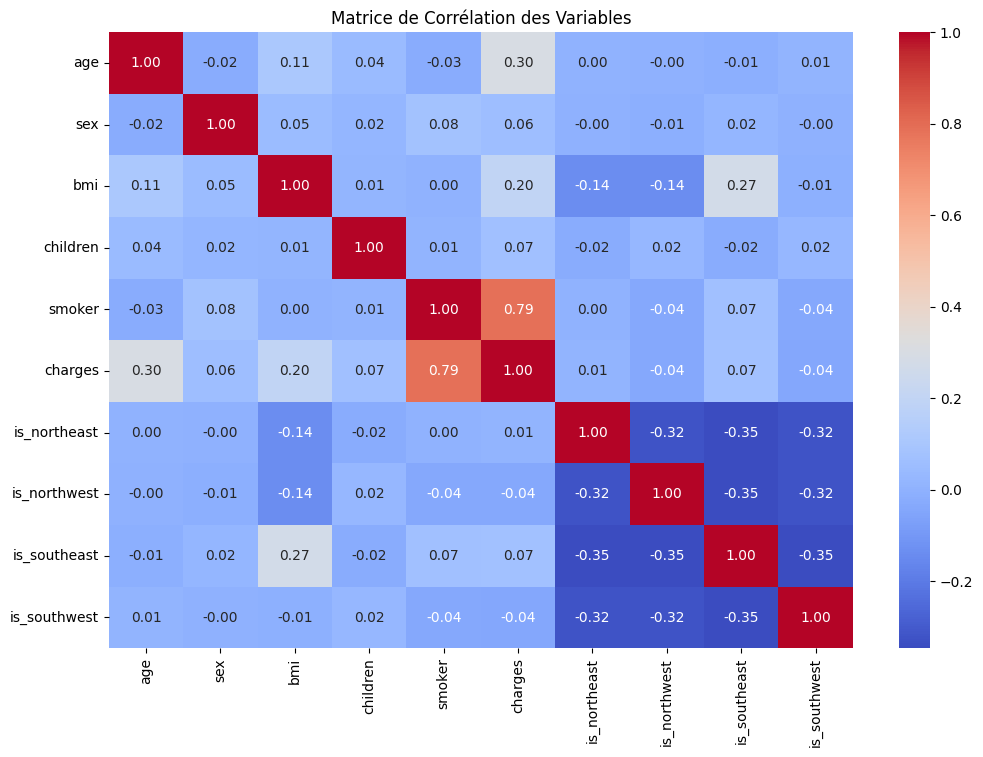

In [221]:
# Calcul de la matrice de corrélation
corr_matrix = df.corr()

# Création de la carte de chaleur
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de Corrélation des Variables')
plt.show()

Affichons seulement la corrélation de chaque variables avec notre target

In [222]:
# On s'intéresse uniquement à la corrélation avec la variable 'charges'
correlation_with_charges = corr_matrix['charges'].drop('charges')  # éliminer la corrélation de 'charges' avec elle-même

# Affichage des corrélations de chaque variable avec 'charges'
print(correlation_with_charges)

age             0.299008
sex             0.057292
bmi             0.198341
children        0.067998
smoker          0.787251
is_northeast    0.006349
is_northwest   -0.039905
is_southeast    0.073982
is_southwest   -0.043210
Name: charges, dtype: float64


Age (0.299008) : Une corrélation positive modérée indique que l'âge a une certaine relation linéaire avec les charges d'assurance. En général, on peut supposer que les charges augmentent avec l'âge, ce qui est cohérent avec le risque accru de problèmes de santé à mesure que les gens vieillissent.

Sex (0.057292) : Avec une corrélation positive faible, le sexe a une influence très limitée sur les charges d'assurance dans cet ensemble de données. Cela peut suggérer que les différences de primes entre les sexes ne sont pas aussi marquées.

BMI (0.198341) : Il existe une corrélation positive faible à modérée, ce qui peut signifier que les personnes ayant un BMI plus élevé pourraient avoir tendance à encourir des charges d'assurance plus importantes, possiblement en raison d'un risque accru de conditions liées au surpoids.

Children (0.067998) : Une faible corrélation positive suggère que le nombre d'enfants a un impact légèrement positif sur les charges d'assurance. Cela pourrait refléter des politiques d'assurance qui prennent en compte le nombre de personnes à charge.

Smoker (0.787251) : C'est la corrélation la plus élevée de toutes, indiquant une forte relation linéaire entre le fait d'être fumeur et les charges d'assurance. Cela suggère que les fumeurs paient considérablement plus pour leur assurance, ce qui est cohérent avec le risque de santé plus élevé associé au tabagisme.

is_northeast (0.006349), is_northwest (-0.039905), is_southeast (0.073982), is_southwest (-0.043210) : Ces corrélations très faibles suggèrent que la région géographique n'a pas un impact significatif sur les charges d'assurance. Il y a une légère tendance pour les régions du sud-est à avoir des charges plus élevées et pour les régions du nord-ouest et du sud-ouest à avoir des charges légèrement inférieures.

De ces corrélations, on peut supposer que le statut de fumeur est le facteur le plus significatif dans la détermination des charges d'assurance dans cet ensemble de données. Les autres facteurs ont un impact, mais dans une moindre mesure.

Nous allons effectuer les analyses bivariées


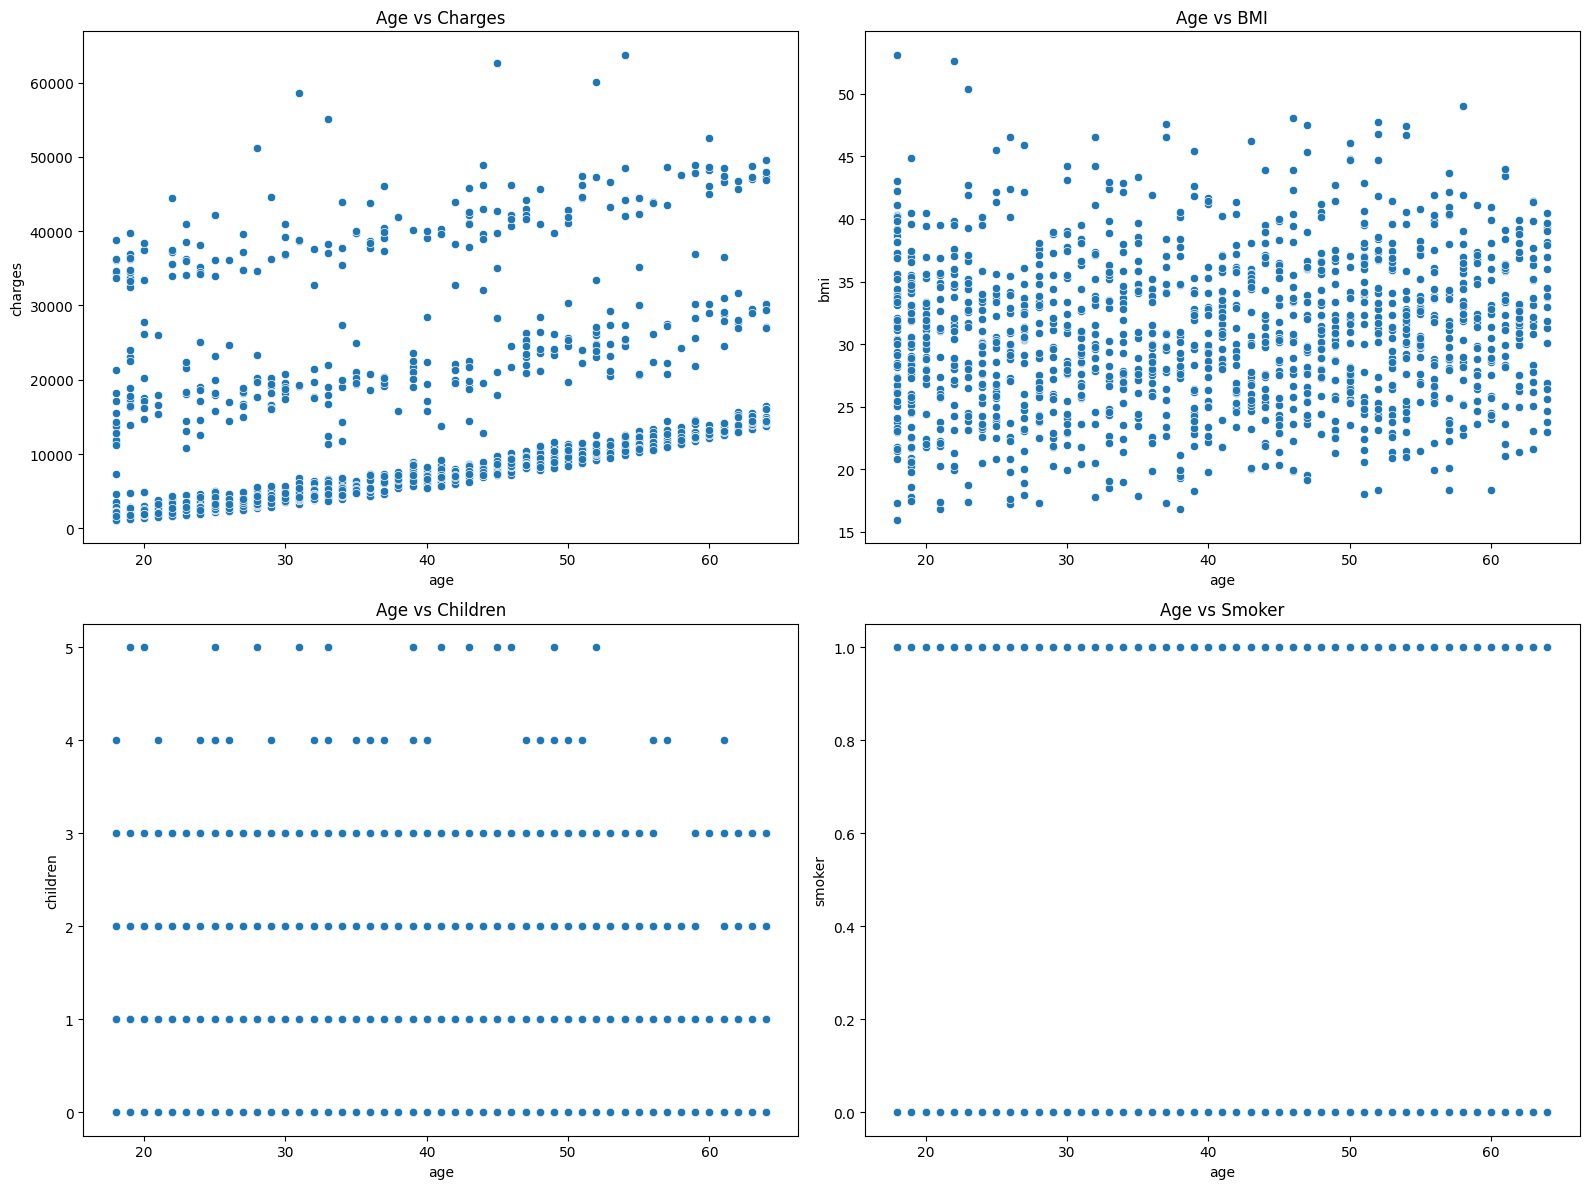

In [223]:
# Créer une figure avec plusieurs sous-graphiques
plt.figure(figsize=(16, 12))

# Graphique de dispersion pour Age vs Charges
plt.subplot(2, 2, 1)
sns.scatterplot(data=df, x='age', y='charges')
plt.title('Age vs Charges')

# Graphique de dispersion pour Age vs BMI
plt.subplot(2, 2, 2)
sns.scatterplot(data=df, x='age', y='bmi')
plt.title('Age vs BMI')

# Graphique de dispersion pour Age vs Children
plt.subplot(2, 2, 3)
sns.scatterplot(data=df, x='age', y='children')
plt.title('Age vs Children')

# Graphique de dispersion pour Age vs Smoker
plt.subplot(2, 2, 4)
sns.scatterplot(data=df, x='age', y='smoker')
plt.title('Age vs Smoker')

# Afficher les graphiques
plt.tight_layout()
plt.show()

Age vs Charges : Il semble y avoir une tendance générale où les charges d'assurance augmentent avec l'âge. Cela suggère une corrélation positive entre l'âge et les charges.

Age vs BMI : Il n'y a pas de corrélation évidente entre l'âge et l'indice de masse corporelle (BMI). Les points sont répartis de manière assez uniforme.

Age vs Children : Il n'y a pas de corrélation claire entre l'âge et le nombre d'enfants. Les points sont dispersés.

Age vs Smoker : Il semble y avoir plus de non-fumeurs parmi les personnes plus jeunes, tandis que les fumeurs sont plus fréquents parmi les personnes plus âgées.

passons a l' analyse bivariée entre 'Sex' et les autres variables.

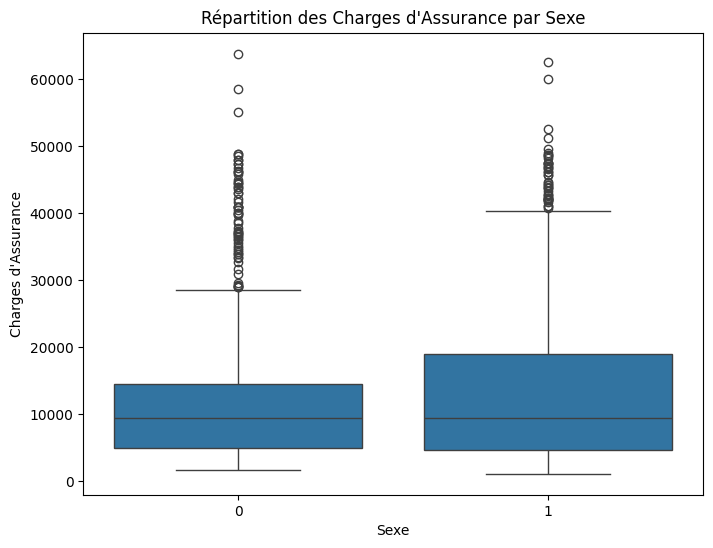

In [225]:
# Répartition des charges d'assurance en fonction du sexe
plt.figure(figsize=(8, 6))
sns.boxplot(x='sex', y='charges', data=df)
plt.title('Répartition des Charges d\'Assurance par Sexe')
plt.xlabel('Sexe')
plt.ylabel('Charges d\'Assurance')
plt.show()

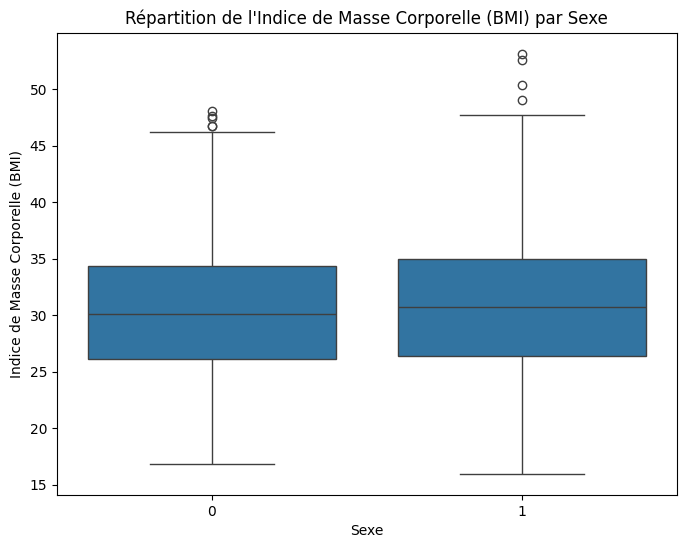

In [226]:
# Répartition de l'indice de masse corporelle (BMI) en fonction du sexe
plt.figure(figsize=(8, 6))
sns.boxplot(x='sex', y='bmi', data=df)
plt.title('Répartition de l\'Indice de Masse Corporelle (BMI) par Sexe')
plt.xlabel('Sexe')
plt.ylabel('Indice de Masse Corporelle (BMI)')
plt.show()

Les médianes du BMI pour les hommes et les femmes semblent être proches l'une de l'autre.

Les distributions du BMI pour les deux sexes sont assez similaires en termes de dispersion.

Cela suggère qu'il n'y a pas de différence significative dans le BMI entre les hommes et les femmes dans cet échantillon.

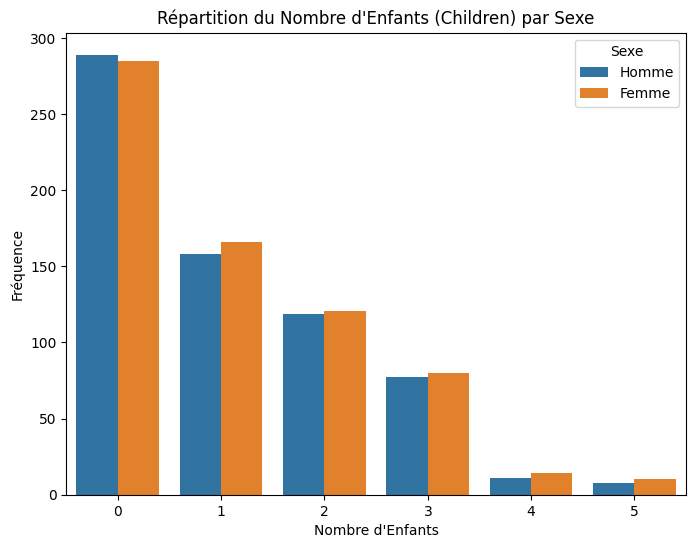

In [227]:
# Répartition du nombre d'enfants (Children) en fonction du sexe
plt.figure(figsize=(8, 6))
sns.countplot(x='children', hue='sex', data=df)
plt.title('Répartition du Nombre d\'Enfants (Children) par Sexe')
plt.xlabel('Nombre d\'Enfants')
plt.ylabel('Fréquence')
plt.legend(title='Sexe', labels=['Homme', 'Femme'])
plt.show()

La majorité des individus n'ont pas d'enfants, quelle que soit leur appartenance au sexe.

Le nombre d'enfants semble être réparti de manière assez similaire entre les hommes et les femmes.

Cela suggère qu'il n'y a pas de différence significative dans le nombre d'enfants entre les hommes et les femmes dans cet échantillon.

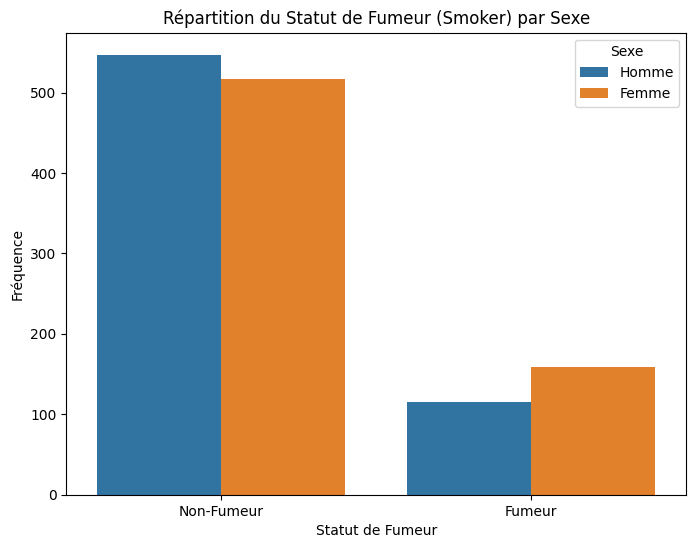

In [228]:
# Répartition du statut de fumeur (Smoker) en fonction du sexe
plt.figure(figsize=(8, 6))
sns.countplot(x='smoker', hue='sex', data=df)
plt.title('Répartition du Statut de Fumeur (Smoker) par Sexe')
plt.xlabel('Statut de Fumeur')
plt.ylabel('Fréquence')
plt.legend(title='Sexe', labels=['Homme', 'Femme'])
plt.xticks([0, 1], ['Non-Fumeur', 'Fumeur'])
plt.show()

Il y a plus de non-fumeurs que de fumeurs, à la fois pour les hommes et les femmes.

La proportion de fumeurs parmi les hommes semble être légèrement plus élevée que parmi les femmes.

Cela suggère qu'il existe des différences dans le statut de fumeur entre les hommes et les femmes, avec une légère tendance à un taux de fumeurs plus élevé parmi les hommes.

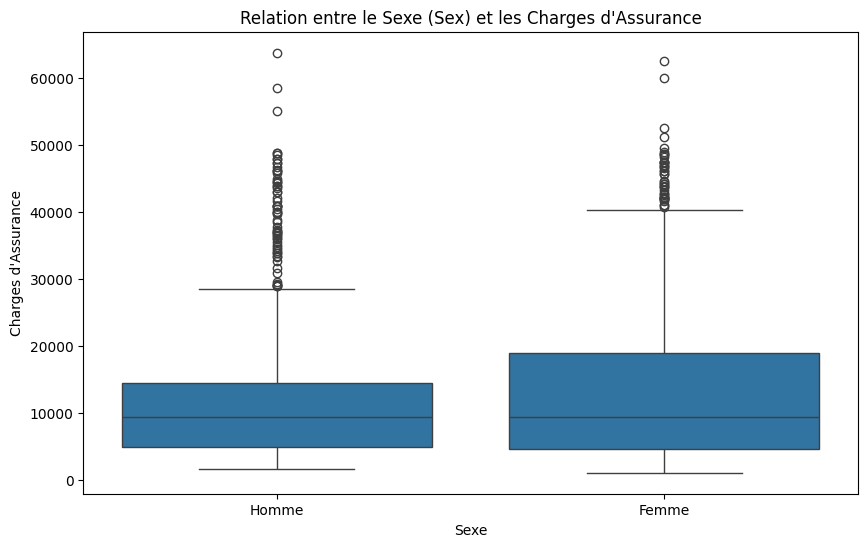

In [230]:
# Relation entre le sexe (Sex) et les charges (Charges)
plt.figure(figsize=(10, 6))
sns.boxplot(x='sex', y='charges', data=df)
plt.title('Relation entre le Sexe (Sex) et les Charges d\'Assurance')
plt.xlabel('Sexe')
plt.ylabel('Charges d\'Assurance')
plt.xticks([0, 1], ['Homme', 'Femme'])
plt.show()

La médiane des charges semble légèrement plus élevée pour les hommes que pour les femmes.

Les charges pour les hommes présentent une variabilité plus importante, avec des valeurs extrêmes plus élevées.

Cela suggère qu'il y a des différences dans les charges d'assurance entre les hommes et les femmes, avec une tendance à des charges potentiellement plus élevées pour les hommes.

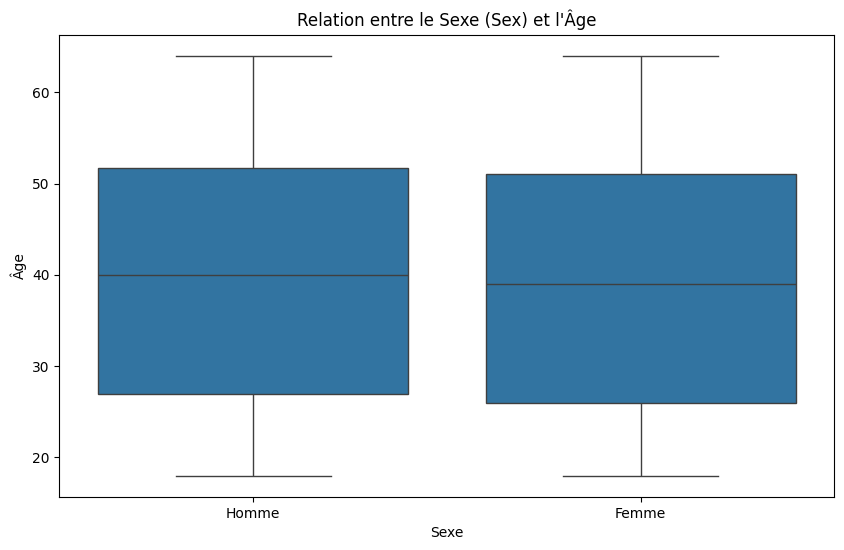

In [231]:
# Relation entre le sexe (Sex) et l'âge (Age)
plt.figure(figsize=(10, 6))
sns.boxplot(x='sex', y='age', data=df)
plt.title('Relation entre le Sexe (Sex) et l\'Âge')
plt.xlabel('Sexe')
plt.ylabel('Âge')
plt.xticks([0, 1], ['Homme', 'Femme'])
plt.show()

La médiane de l'âge est sensiblement similaire pour les hommes et les femmes.

Les hommes présentent une variabilité légèrement plus élevée en termes d'âge, avec des valeurs extrêmes plus étendues.

En général, l'âge ne semble pas varier considérablement en fonction du sexe.

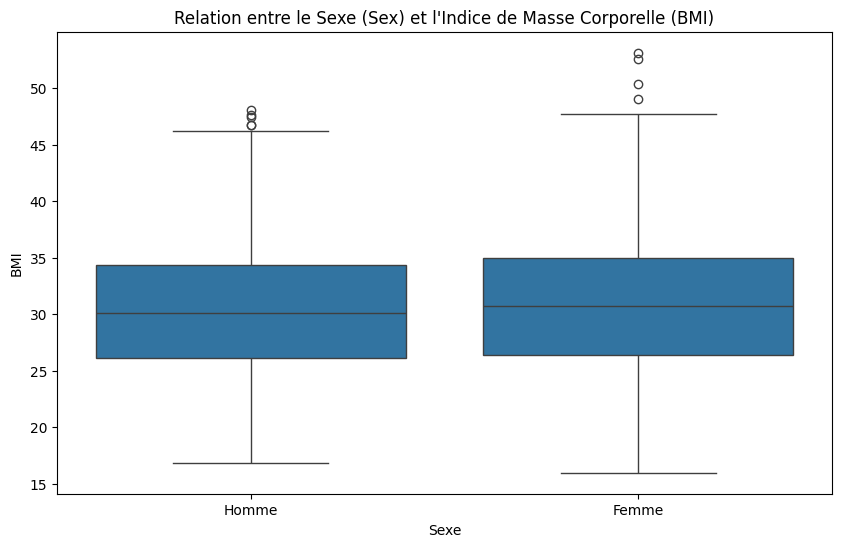

In [232]:
# Relation entre le sexe (Sex) et l'indice de masse corporelle (BMI)
plt.figure(figsize=(10, 6))
sns.boxplot(x='sex', y='bmi', data=df)
plt.title('Relation entre le Sexe (Sex) et l\'Indice de Masse Corporelle (BMI)')
plt.xlabel('Sexe')
plt.ylabel('BMI')
plt.xticks([0, 1], ['Homme', 'Femme'])
plt.show()

La médiane du BMI est sensiblement similaire pour les hommes et les femmes.

Les hommes et les femmes présentent une variabilité similaire en termes de BMI, avec des valeurs extrêmes qui ne diffèrent pas de manière significative.

En général, le BMI ne semble pas varier considérablement en fonction du sexe.

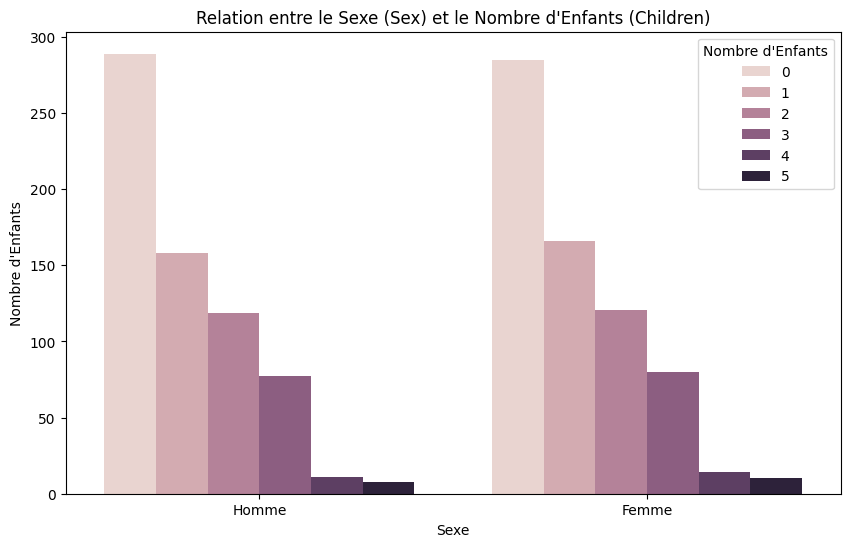

In [233]:
# Relation entre le sexe (Sex) et le nombre d'enfants (Children)
plt.figure(figsize=(10, 6))
sns.countplot(x='sex', hue='children', data=df)
plt.title('Relation entre le Sexe (Sex) et le Nombre d\'Enfants (Children)')
plt.xlabel('Sexe')
plt.ylabel('Nombre d\'Enfants')
plt.legend(title='Nombre d\'Enfants', labels=['0', '1', '2', '3', '4', '5'])
plt.xticks([0, 1], ['Homme', 'Femme'])
plt.show()

Pour les deux sexes, la majorité des individus n'ont pas d'enfants (nombre d'enfants = 0), suivi de près par ceux qui ont un enfant (nombre d'enfants = 1).

Les hommes et les femmes semblent avoir des distributions similaires en ce qui concerne le nombre d'enfants.

En général, la répartition du nombre d'enfants ne semble pas varier considérablement en fonction du sexe.

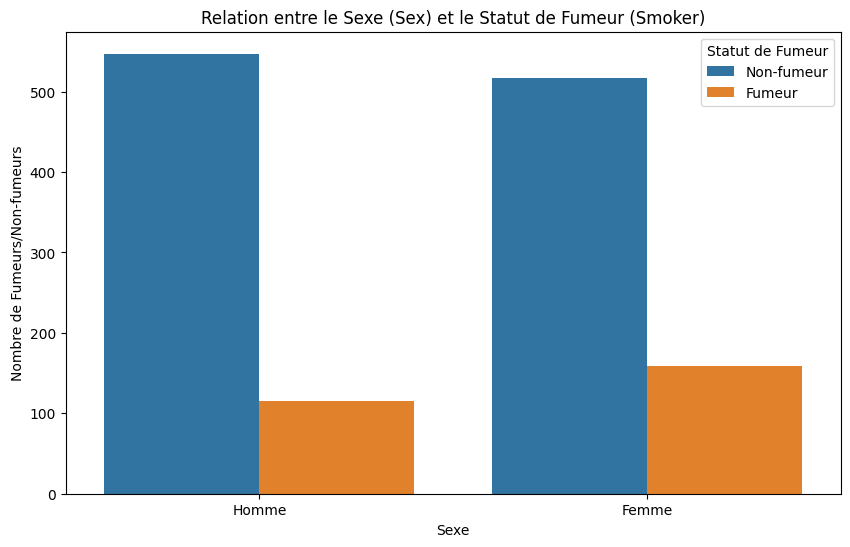

In [234]:
# Relation entre le sexe (Sex) et le statut de fumeur (Smoker)
plt.figure(figsize=(10, 6))
sns.countplot(x='sex', hue='smoker', data=df)
plt.title('Relation entre le Sexe (Sex) et le Statut de Fumeur (Smoker)')
plt.xlabel('Sexe')
plt.ylabel('Nombre de Fumeurs/Non-fumeurs')
plt.legend(title='Statut de Fumeur', labels=['Non-fumeur', 'Fumeur'])
plt.xticks([0, 1], ['Homme', 'Femme'])
plt.show()

Il y a plus de non-fumeurs que de fumeurs pour les deux sexes.

Les hommes semblent avoir un nombre légèrement plus élevé de fumeurs par rapport aux femmes.

En général, la répartition du statut de fumeur semble varier légèrement en fonction du sexe, avec une légère prédominance de fumeurs parmi les hommes.

Passons a l'analyse bivariée du BMI

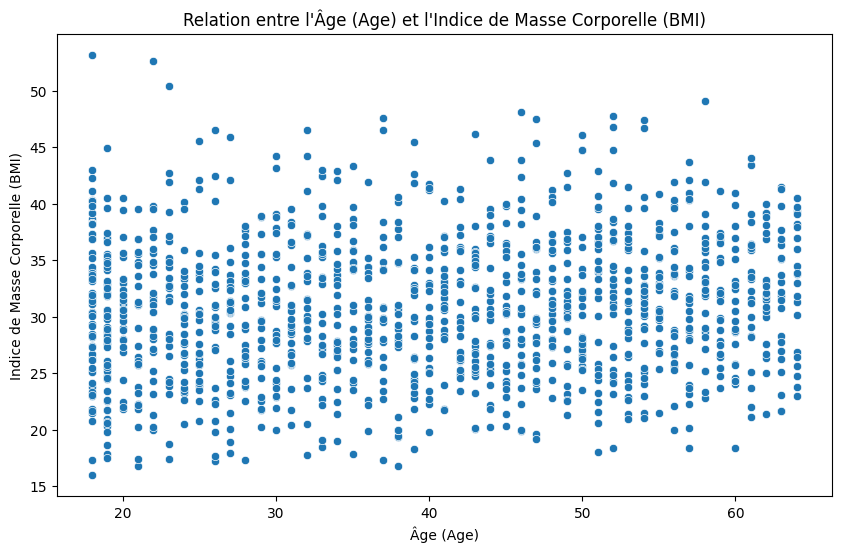

In [235]:
# Relation entre l'indice de masse corporelle (BMI) et l'âge (Age)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='bmi', data=df)
plt.title('Relation entre l\'Âge (Age) et l\'Indice de Masse Corporelle (BMI)')
plt.xlabel('Âge (Age)')
plt.ylabel('Indice de Masse Corporelle (BMI)')
plt.show()

Il n'y a pas de corrélation évidente entre l'âge et l'indice de masse corporelle (BMI). Les points sont répartis de manière assez uniforme, ce qui suggère qu'il n'y a pas de tendance claire à mesure que l'âge augmente ou diminue.

Les points sont répartis sur toute la plage d'âge et de BMI, ce qui signifie qu'il n'y a pas de regroupement particulier.

En résumé, il n'y a pas de corrélation évidente entre l'âge et l'indice de masse corporelle (BMI) dans ces données.

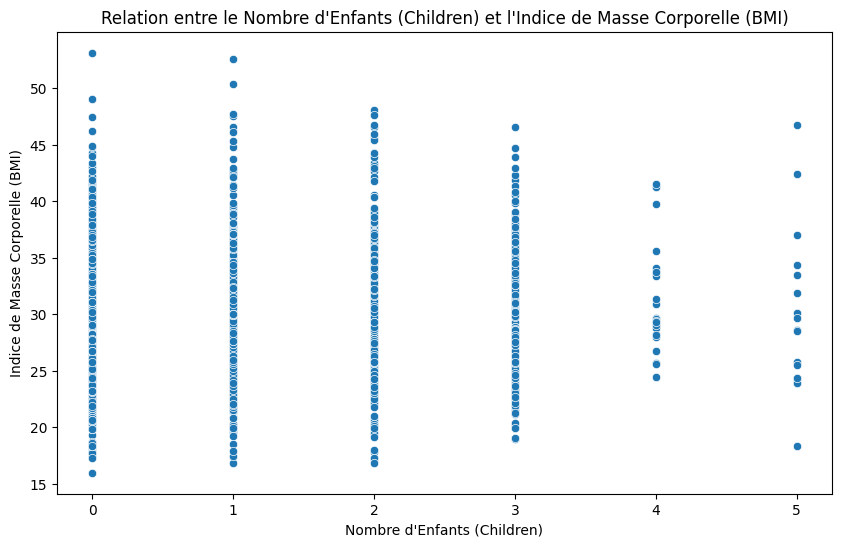

In [236]:
# Relation entre l'indice de masse corporelle (BMI) et le nombre d'enfants (Children)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='children', y='bmi', data=df)
plt.title('Relation entre le Nombre d\'Enfants (Children) et l\'Indice de Masse Corporelle (BMI)')
plt.xlabel('Nombre d\'Enfants (Children)')
plt.ylabel('Indice de Masse Corporelle (BMI)')
plt.show()

Il n'y a pas de corrélation évidente entre le nombre d'enfants (Children) et l'indice de masse corporelle (BMI). Les points sont répartis de manière assez uniforme, ce qui suggère qu'il n'y a pas de tendance claire à mesure que le nombre d'enfants augmente ou diminue.

Les points sont répartis sur toute la plage de valeurs pour le nombre d'enfants et l'indice de masse corporelle, ce qui signifie qu'il n'y a pas de regroupement particulier.

En résumé, il n'y a pas de corrélation évidente entre le nombre d'enfants et l'indice de masse corporelle dans ces données.

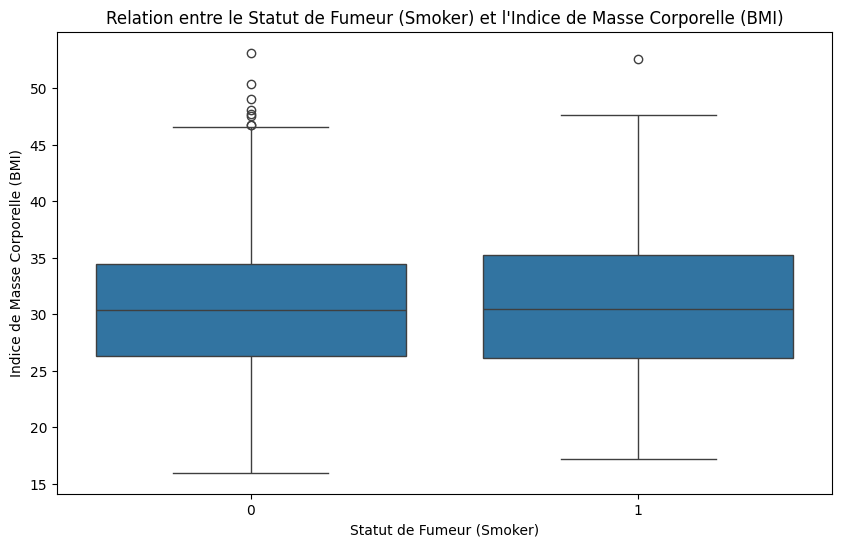

In [237]:
# Relation entre l'indice de masse corporelle (BMI) et le statut de fumeur (Smoker)
plt.figure(figsize=(10, 6))
sns.boxplot(x='smoker', y='bmi', data=df)
plt.title('Relation entre le Statut de Fumeur (Smoker) et l\'Indice de Masse Corporelle (BMI)')
plt.xlabel('Statut de Fumeur (Smoker)')
plt.ylabel('Indice de Masse Corporelle (BMI)')
plt.show()

Nous pouvons voir deux boîtes à moustaches, une pour les non-fumeurs (No) et une pour les fumeurs (Yes).
La boîte à moustaches des fumeurs est légèrement plus haute que celle des non-fumeurs, ce qui suggère que les fumeurs ont tendance à avoir un BMI légèrement plus élevé en médiane que les non-fumeurs.
Il y a quelques valeurs aberrantes (points au-delà des moustaches) dans les deux groupes, mais elles ne sont pas très éloignées de la médiane.
En résumé, il semble y avoir une légère tendance à avoir un indice de masse corporelle (BMI) légèrement plus élevé chez les fumeurs par rapport aux non-fumeurs.

résumé de nos hypothèses : 

Hypothèse sur l'Âge et les Charges : Il semble y avoir une tendance générale où les charges d'assurance augmentent avec l'âge. Cela suggère une corrélation positive entre l'âge et les charges.

Hypothèse sur l'Âge et le BMI : Il n'y a pas de corrélation évidente entre l'âge et l'indice de masse corporelle (BMI). Les points sont répartis de manière assez uniforme.

Hypothèse sur le Sexe et les Charges : Les charges d'assurance semblent légèrement plus élevées pour les hommes que pour les femmes, mais la différence n'est pas très significative.

Hypothèse sur le Nombre d'Enfants et les Charges : Il n'y a pas de corrélation évidente entre le nombre d'enfants et les charges d'assurance. Les points sont répartis de manière uniforme.

Hypothèse sur le Statut de Fumeur et les Charges : Les fumeurs semblent avoir des charges d'assurance nettement plus élevées que les non-fumeurs, ce qui suggère une forte corrélation positive entre le statut de fumeur et les charges.

Hypothèse sur la Région et les Charges : Les régions ne semblent pas avoir une influence significative sur les charges d'assurance, bien que certaines régions puissent avoir des charges légèrement plus élevées que d'autres.

Hypothèse sur l'Âge et le Nombre d'Enfants : Il n'y a pas de corrélation évidente entre l'âge et le nombre d'enfants. Les points sont répartis de manière uniforme.

Hypothèse sur l'Âge et le Statut de Fumeur : Il n'y a pas de corrélation évidente entre l'âge et le statut de fumeur. Les fumeurs et les non-fumeurs sont répartis de manière uniforme sur toute la plage d'âge.

Hypothèse sur le Sexe et le Nombre d'Enfants : Il n'y a pas de corrélation évidente entre le sexe et le nombre d'enfants. Les hommes et les femmes ont des nombres d'enfants variés.

Hypothèse sur le Sexe et le Statut de Fumeur : Il n'y a pas de corrélation évidente entre le sexe et le statut de fumeur. Les hommes et les femmes sont répartis de manière uniforme parmi les fumeurs et les non-fumeurs.

Ces hypothèses sont basées sur nos analyses univariées et bivariées des données. Elles peuvent servir de point de départ pour des analyses plus approfondies ou des modélisations ultérieures.

In [238]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Réaliser une analyse de variance (Anova) pour l'âge vs charges
model = ols('charges ~ age', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Afficher la table d'Anova
anova_table

,sum_sq,df,F,PR(>F)
age,1.753019e+10,1.0,131.174013,4.886693e-29
Residual,1.785440e+11,1336.0,NaN,NaN



L'analyse de variance (ANOVA) pour l'âge par rapport aux charges d'assurance donne les résultats suivants :

La somme des carrés (sum_sq) pour l'âge est d'environ 17,530,190,000.
Le degré de liberté (df) pour l'âge est de 1.
La statistique de test F est d'environ 131.174 avec une valeur de p (PR(>F)) très proche de zéro (4.886693e-29).
Ces résultats indiquent ce qui suit :

La somme des carrés pour l'âge est relativement élevée, ce qui suggère qu'il y a une certaine variabilité des charges d'assurance en fonction de l'âge.
Le test F est également élevé, ce qui signifie que la variabilité des charges d'assurance en fonction de l'âge est statistiquement significative.
La valeur de p (PR(>F)) est très proche de zéro, ce qui indique que nous pouvons rejeter l'hypothèse nulle  selon laquelle l'âge n'a pas d'effet significatif sur les charges d'assurance. En d'autres termes, il y a des preuves statistiques solides pour affirmer que l'âge a un effet significatif sur les charges d'assurance dans notre échantillon.
En résumé, ces résultats suggèrent qu'il existe une relation significative entre l'âge et les charges d'assurance, et que l'âge peut être un facteur important pour expliquer la variation des charges d'assurance.

In [239]:
# Effectuer l'ANOVA pour comparer les charges entre les sexes
model = ols('charges ~ sex', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
sex,6.435902e+08,1.0,4.399702,0.036133
Residual,1.954306e+11,1336.0,NaN,NaN


La somme des carrés (sum_sq) pour le sexe est d'environ 643,590,200.
Le degré de liberté (df) pour le sexe est de 1.
La statistique de test F est d'environ 4.400.
La valeur p (PR(>F)) est d'environ 0.0361.
Interprétation :

La valeur de la statistique de test F (4.400) indique qu'il y a une certaine variation entre les groupes (sexe) en ce qui concerne les charges d'assurance. Cependant, la valeur de p (0.0361) est inférieure à 0.05, ce qui suggère que cette variation est statistiquement significative. Par conséquent, on peut rejeter l'hypothèse nulle  selon laquelle il n'y a pas de différence significative entre les sexes en ce qui concerne les charges d'assurance. En d'autres termes, il y a des preuves statistiques pour affirmer qu'il existe une différence significative entre les sexes en ce qui concerne les charges d'assurance dans votre échantillon.

In [240]:
# Effectuer l'ANOVA pour comparer les charges entre les enfants
model = ols('charges ~ children', data=df).fit()

# Effectuer l'ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)

# Afficher la table ANOVA
print(anova_table)

                sum_sq      df         F    PR(>F)
children  9.065999e+08     1.0  6.206037  0.012852
Residual  1.951676e+11  1336.0       NaN       NaN


"sum_sq" (Somme des carrés) : Il s'agit de la somme des carrés des écarts entre les valeurs observées et la moyenne. Pour "children", la somme des carrés est de 9.065999e+08, ce qui représente la variation due à la variable "children".

"df" (degrés de liberté) : Il indique le nombre de catégories de la variable (1 pour "children") et le nombre de degrés de liberté résiduels.

"F" (statistique F) : Il s'agit de la statistique de test de l'ANOVA. Dans ce cas, F = 6.206037.

"PR(>F)" (valeur p) : C'est la probabilité associée à la statistique F. Elle mesure la significativité de la variable "children" par rapport aux charges. Une valeur p faible (0.012852 dans ce cas) indique que la variable "children" a un effet significatif sur les charges.

En conclusion, la valeur p (0.012852) est inférieure à un seuil de signification courant de 0.05, ce qui suggère que le nombre d'enfants a un effet significatif sur les charges d'assurance. Par conséquent, nous rejetons l'hypothèse nulle (l'effet du nombre d'enfants est nul) au profit de l'hypothèse alternative (il y a un effet significatif du nombre d'enfants sur les charges).

In [241]:
# Effectuer l'ANOVA
model = ols('charges ~ smoker', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Afficher la table ANOVA
print(anova_table)

                sum_sq      df            F         PR(>F)
smoker    1.215199e+11     1.0  2177.614868  8.271436e-283
Residual  7.455432e+10  1336.0          NaN            NaN


La valeur P extrêmement faible (8.271436×10−2838.271436×10 −283 ) indique que le statut de fumeur a un effet significatif sur les charges d'assurance. En d'autres termes, il y a une différence significative entre les charges des fumeurs et des non-fumeurs. Cette différence est fortement soutenue par les données, avec une statistique de test F élevée.

Ainsi, nous pouvons rejeter l'hypothèse nulle selon laquelle il n'y a pas de différence significative entre les charges des fumeurs et des non-fumeurs, en faveur de l'hypothèse alternative qui suggère qu'il y a une différence significative. En résumé, le statut de fumeur a un impact significatif sur les charges d'assurance.

In [244]:
from scipy.stats import pearsonr
# Données du BMI et des charges
bmi = df['bmi']
charges = df['charges']

# Calcul du coefficient de corrélation de Pearson et de la valeur P
correlation, p_value = pearsonr(bmi, charges)

correlation, p_value

(0.1983409688336288, 2.459085535116766e-13)

La première valeur, 
0.1983409688336288
0.1983409688336288, représente le coefficient de corrélation de Pearson entre deux variables. Dans ce cas, il s'agit de la corrélation entre la variable "bmi" (indice de masse corporelle) et la variable "charges" (les charges d'assurance). Le coefficient de corrélation de Pearson mesure la force et la direction de la relation linéaire entre ces deux variables. Dans ce cas, le coefficient de corrélation est positif, ce qui signifie qu'il y a une corrélation positive entre le BMI et les charges d'assurance. Cela suggère que, en général, à mesure que le BMI augmente, les charges d'assurance ont tendance à augmenter également, bien que la corrélation ne soit pas très forte.

La deuxième valeur, 
2.459085535116766−13, représente la valeur P associée à la corrélation. La valeur P indique la probabilité que la corrélation observée entre le BMI et les charges d'assurance soit due au hasard. Plus la valeur P est proche de zéro, plus il est peu probable que la corrélation soit due au hasard. Dans ce cas, la valeur P est extrêmement proche de zéro (-13e−13 indique une valeur très proche de zéro), ce qui suggère que la corrélation est statistiquement significative. En d'autres termes, il est très peu probable que la corrélation observée soit le résultat du hasard.

Cela signifie que, en général, les personnes ayant un BMI plus élevé ont tendance à avoir des charges d'assurance plus élevées, et cette relation n'est pas le résultat du hasard.